# Análisis exploratorio de feature selection
*   Completitud de variables,
*   Varianza de variables
*   Determinar qué variables vale la pena eliminar/mantener


TODOs: Hoy
* Analisis exploratorios de datos (Distribucion por tipo de datos, Varianza de datos numericos,
* Modificar funciones ya escritas para que de el output de una matriz de votos
* Funcion de normalizacion
* Crear Information Value function
* correlacion no lineal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/dreamAD"

final_merged_data.csv


In [4]:
#Read file
file_path = '/content/drive/My Drive/dreamAD/final_merged_data.csv'
data = pd.read_csv(file_path)

In [5]:
data.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


1. # Completeness analysis

In [6]:
#Check missing values
missing_count = data.isna().sum()
print(len(missing_count[missing_count > 0]))

0


In [7]:
def completeness_filter(df: pd.DataFrame, min_completeness_pct: float = 40.0):

    #Numeric and non-numeric columnsvariation_of_information_score
    numerics = df.select_dtypes(include=np.number).columns.tolist()
    no_numerics = df.select_dtypes(exclude=np.number).columns.tolist()
    #Completeness analysis
    completeness = df[numerics].apply(lambda col: (col != 0).sum() / len(col) * 100)

    #Create the completeness percent table
    pct_completeness = completeness.reset_index()
    pct_completeness.columns = ['Variable', 'completeness_Pct']
    pct_completeness = pct_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Vars that passed the filter
    numeric_filtered = completeness[completeness >= min_completeness_pct].index.tolist()
    #Combine non-numeric columns (which are always saved) with numeric columns that passed
    final_cols = no_numerics + numeric_filtered

    #Final filter
    df_filtered = df[final_cols]

    return df_filtered, numeric_filtered, pct_completeness

In [8]:
completeness_filtered, completeness_vars, completeness_pct = completeness_filter(data, 80.0)

In [9]:
completeness_filtered.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


In [10]:
len(completeness_vars)

6446

In [11]:
completeness_pct.head(10)

,Variable,completeness_Pct
222,clustering_global_L4-IT_MTG,0.0
706,largest_community_size_Pax6_A9,0.0
240,clustering_local_mean_L5-6-NP_A9,0.0
241,clustering_global_L5-6-NP_A9,0.0
688,n_nodes_Pax6_A9,0.0
689,n_edges_Pax6_A9,0.0
716,clustering_global_Pax6_MTG,0.0
722,Q_modularity_Pax6_MTG,0.0
221,clustering_local_mean_L4-IT_MTG,0.0
705,n_communities_Pax6_A9,0.0


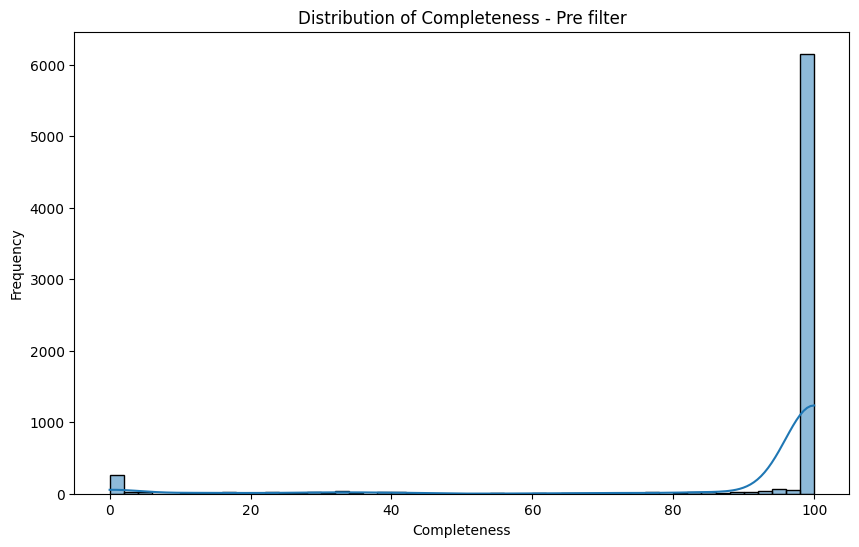

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Pre filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

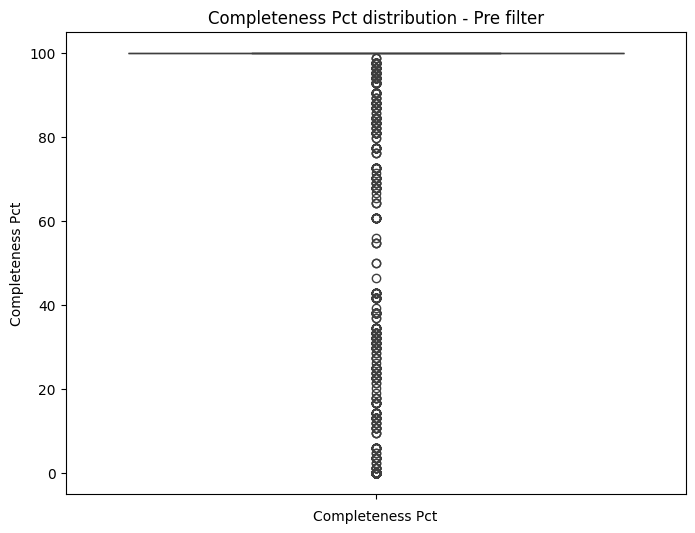

In [13]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Pre filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

In [14]:
_, _, post_completeness_pct = completeness_filter(completeness_filtered)

In [15]:
post_completeness_pct.head(10)

,Variable,completeness_Pct
179,n_components_Lamp5_MTG,80.952381
178,frac_giant_component_Lamp5_MTG,80.952381
6,CERAD,80.952381
180,deg_mean_Lamp5_MTG,80.952381
184,largest_community_size_Lamp5_MTG,80.952381
181,deg_median_Lamp5_MTG,80.952381
182,kcore_max_Lamp5_MTG,80.952381
183,n_communities_Lamp5_MTG,80.952381
175,diameter_Lamp5_MTG,80.952381
174,avg_path_len_Lamp5_MTG,80.952381


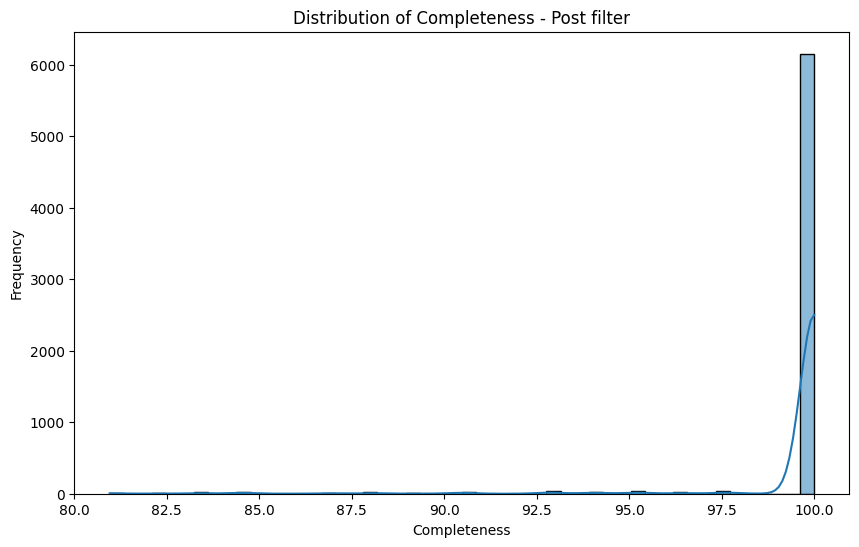

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(post_completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Post filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

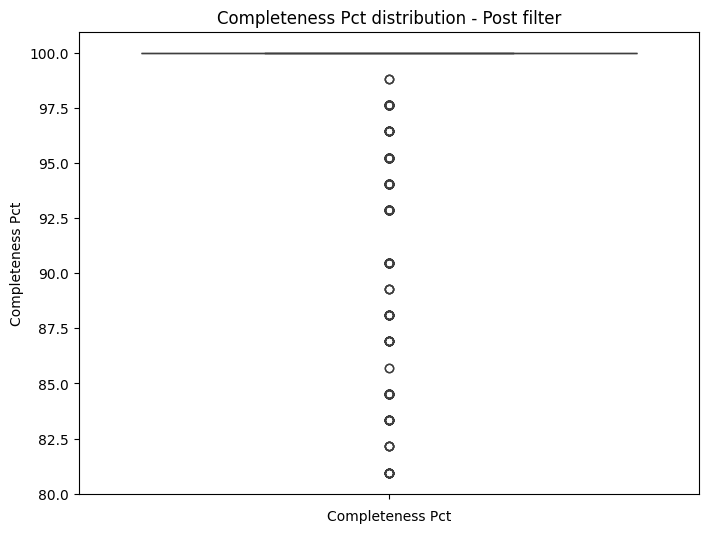

In [17]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=post_completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Post filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

## The variants here selected are in:

In [18]:
completeness_vars

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Thal',
 'Braak',
 'CERAD',
 'ADNC',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'Race_1',
 'Race_2',
 'Race_3',
 'Race_5',
 'Race_7',
 'Race_8',
 'Race_9',
 'Race_11',
 'n_nodes_Astrocyte_A9',
 'n_edges_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'diameter_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'size_giant_component_Astrocyte_A9',
 'frac_giant_component_Astrocyte_A9',
 'n_components_Astrocyte_A9',
 'assortativity_Astrocyte_A9',
 'deg_mean_Astrocyte_A9',
 'deg_median_Astrocyte_A9',
 'deg_sd_Astrocyte_A9',
 'kcore_max_Astrocyte_A9',
 'Q_modularity_Astrocyte_A9',
 'perc_targeted_50_Astrocyte_A9',
 'n_communities_Astrocyte_A9',
 'largest_community_size_Astrocyte_A9',
 'n_nodes_L2-3-IT_A9',
 'n_edges_L2-3-IT_A9',
 'avg_path_len_L2-3-IT_A9',
 'diameter_L2-3-IT_A9',
 'global_density_L2-3-IT_A9',
 'size_giant_component_L2-3-IT_A9',
 'fra

# 2. Variance

In [19]:
def varianced(df, quartile=4, return_variance_table=False):
    """
    Filtra columnas de un DataFrame según su varianza y, opcionalmente,
    devuelve la tabla de varianzas.

    Args:
    -----------
    df (pd.DataFrame): DataFrame de entrada.
    quartile (int): Cuartil a conservar (1, 2, 3, o 4).
    keep_non_numeric (bool): Si es True, conserva las columnas no numéricas.
    return_variance_table (bool): Si es True, devuelve también la tabla de varianzas.

    Returns:
    --------
    pd.DataFrame or tuple:
        - Si return_variance_table es False (default), devuelve solo el DataFrame filtrado.
        - Si es True, devuelve una tupla: (DataFrame_filtrado, DataFrame_de_varianzas).
    """
    if isinstance(df, dict):
        df = pd.DataFrame(df)

    #Calculate the variance of all numeric columns.
    numeric_cols = df.select_dtypes(include=["number"])
    variance_table = numeric_cols.var().to_frame("Variance").sort_values("Variance", ascending=False)

    #Calculate the quartile limits
    quantiles = np.quantile(variance_table["Variance"], [0, 0.25, 0.5, 0.75, 1.0])
    bounds = {
        1: (quantiles[0], quantiles[1]),
        2: (quantiles[1], quantiles[2]),
        3: (quantiles[2], quantiles[3]),
        4: (quantiles[3], quantiles[4])
    }

    #Select vars within the quartile specified
    low, high = bounds[quartile]
    variance_vars = variance_table[
        (variance_table["Variance"] >= low) & (variance_table["Variance"] <= high)
    ].index.tolist()

    #Filter data
    non_numeric_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
    variance_vars = non_numeric_cols + variance_vars
    filtered_df = df[variance_vars]

    #If you need the variance table
    if return_variance_table:
        return filtered_df, variance_table, variance_vars
    else:
        return filtered_df, variance_vars

In [20]:
variance_filter, variance_data, variance_vars = varianced(data, quartile=3, return_variance_table=True)

In [21]:
variance_filter.head(10)

,Donor ID,4_Sst_A9,32_L6-CT_A9,46_Oligodendrocyte_A9,107_L2-3-IT_A9,120_L5-IT_MTG,21_L6-IT_MTG,102_L4-IT_MTG,91_Oligodendrocyte_MTG,27_L5-IT_MTG,...,77_L5-ET_A9,77_Endothelial_A9,77_Pax6_MTG,77_Sst-Chodl_MTG,77_Sst-Chodl_A9,77_Pax6_A9,77_VLMC_A9,37_L6b_MTG,perc_targeted_50_Pvalb_A9,10_L6-IT-Car3_MTG
0,H20-33-034,-0.214357,0.154588,-0.376145,-0.568315,-0.320554,0.488431,0.027838,-0.161690,0.082198,...,-0.331716,-0.303661,-0.305186,-0.303661,-0.290001,-0.311495,-0.290001,0.094291,0.20,-0.134066
1,H21-33-035,-0.674085,0.249331,-0.675951,-0.583855,0.197997,-0.192516,0.448993,-0.541555,-0.495461,...,-0.252510,-0.252510,-0.252510,-0.306103,-0.252510,-0.252510,-0.252510,0.011959,0.20,-0.001594
2,H20-33-014,-0.870037,0.146164,-0.253442,-0.420892,0.075997,0.579823,0.251080,-0.044463,-0.502546,...,-0.287868,-0.290001,-0.304482,-0.304482,-0.433972,-0.304817,-0.363144,0.090475,0.28,-0.022146
3,H21-33-015,-0.629151,0.280975,-0.672948,-0.614739,0.179967,-0.163466,0.448450,-0.528808,-0.472534,...,-0.075811,-0.075811,-0.075811,-0.174731,-0.597141,-0.357664,-0.059521,0.024518,0.24,0.007216
4,H20-33-033,-0.193419,0.029182,-0.313316,0.199206,0.207330,-0.079737,0.532894,-0.538446,-0.483711,...,-0.326319,-0.304817,-0.300643,-0.062847,-0.326678,-0.298900,-0.326678,0.096941,0.20,-0.053516
5,H21-33-043,-0.639367,0.274661,-0.681372,-0.611235,0.170006,-0.166037,0.452691,-0.526649,-0.472035,...,-0.440735,-0.211197,-0.440735,-0.059521,-0.453564,-0.228967,-0.440735,0.040542,0.20,0.009258
6,H21-33-005,-0.639695,0.274415,-0.675577,-0.487877,0.210892,-0.168694,0.455290,-0.550881,-0.513369,...,-0.429304,-0.302819,-0.429304,-0.444702,-0.228967,-0.304646,-0.429304,0.029613,0.30,0.017456
7,H20-33-031,-0.401496,-0.369065,-0.396656,-0.225246,-0.223911,-0.075634,0.396807,-0.329216,0.258790,...,-0.433972,-0.326678,-0.397556,-0.290001,-0.359042,-0.359042,-0.287868,0.111251,0.20,0.007206
8,H21-33-036,-0.627862,0.275338,-0.673015,-0.524661,0.199607,-0.163220,0.453597,-0.548591,-0.500641,...,-0.166089,-0.166089,-0.166089,-0.087922,-0.059521,-0.043626,-0.444702,0.025004,0.20,-0.002197
9,H21-33-002,-0.645870,0.272416,-0.689786,-0.583527,0.156267,-0.163576,0.453461,-0.516933,-0.459802,...,-0.453564,-0.453564,-0.453564,-0.100471,-0.444702,-0.440735,-0.211197,0.026867,0.40,0.013210


In [22]:
variance_data.head(10)

,Variance
n_edges_L5-IT_MTG,6.895924e+09
n_edges_L2-3-IT_A9,6.305776e+09
n_edges_L2-3-IT_MTG,5.859007e+09
n_edges_L5-IT_A9,5.731587e+09
n_edges_Pvalb_MTG,3.492076e+09
n_edges_L4-IT_A9,3.342557e+09
n_edges_Pvalb_A9,3.254402e+09
n_edges_Vip_MTG,2.881807e+09
n_edges_L6-IT_A9,2.722178e+09
n_edges_L4-IT_MTG,2.707036e+09


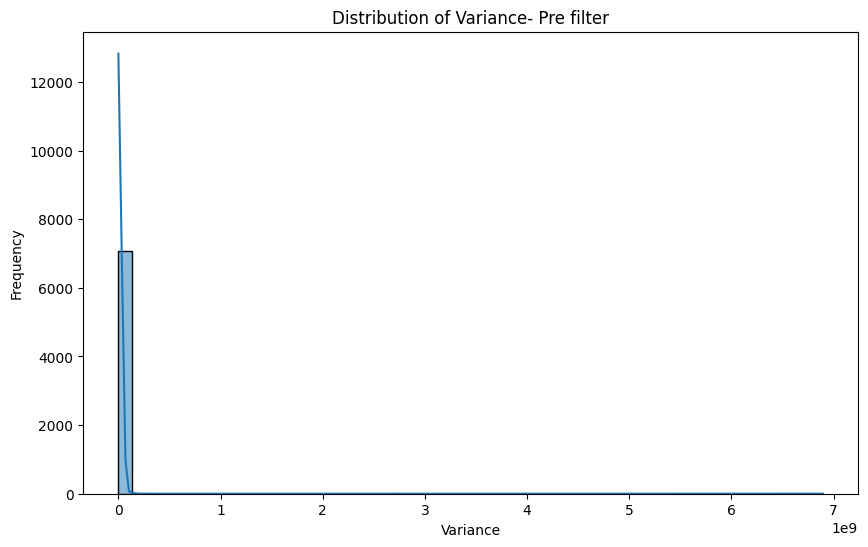

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(variance_data['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [24]:
len(variance_vars)

1775

In [25]:
_,variance_data_post,_ = varianced(variance_filter, quartile=1, return_variance_table=True)

In [26]:
variance_data_post

,Variance
4_Sst_A9,0.042098
32_L6-CT_A9,0.042057
46_Oligodendrocyte_A9,0.042055
107_L2-3-IT_A9,0.042055
120_L5-IT_MTG,0.042045
...,...
77_Pax6_A9,0.010338
77_VLMC_A9,0.010338
37_L6b_MTG,0.010335
perc_targeted_50_Pvalb_A9,0.010334


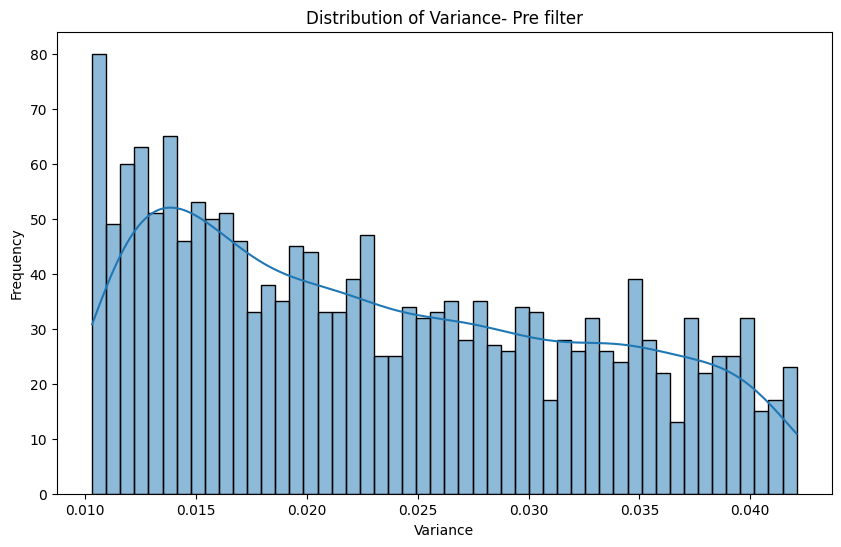

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(variance_data_post['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

## The variants here selected are in


In [28]:
variance_vars[0:10]

['Donor ID',
 '4_Sst_A9',
 '32_L6-CT_A9',
 '46_Oligodendrocyte_A9',
 '107_L2-3-IT_A9',
 '120_L5-IT_MTG',
 '21_L6-IT_MTG',
 '102_L4-IT_MTG',
 '91_Oligodendrocyte_MTG',
 '27_L5-IT_MTG',
 '48_Pvalb_A9',
 '76_Pvalb_MTG',
 '39_L2-3-IT_MTG',
 '127_Pvalb_MTG',
 '125_L5-IT_A9',
 '57_Lamp5_MTG',
 '11_L6-IT_A9',
 '16_Astrocyte_A9',
 'assortativity_L6-IT_MTG',
 '110_Pvalb_A9',
 '20_L6-CT_A9',
 '1_Lamp5_MTG',
 '123_Vip_A9',
 '121_Oligodendrocyte_MTG',
 '29_L2-3-IT_MTG',
 '45_Oligodendrocyte_MTG',
 '42_L2-3-IT_MTG',
 '108_L6-IT-Car3_MTG',
 '116_L4-IT_MTG',
 '23_Oligodendrocyte_A9',
 '121_Sst_MTG',
 '32_Sst_MTG',
 '64_Vip_A9',
 '44_Astrocyte_MTG',
 '71_L6b_A9',
 '2_Microglia-PVM_A9',
 '99_Astrocyte_A9',
 '66_L6-IT_MTG',
 '53_Vip_A9',
 'Q_modularity_Vip_A9',
 '41_Sst_MTG',
 '31_Sst_MTG',
 '55_Oligodendrocyte_MTG',
 '84_Lamp5_A9',
 '100_L5-IT_A9',
 '51_Pvalb_MTG',
 'global_density_Chandelier_A9',
 '77_L2-3-IT_A9',
 '109_Lamp5_A9',
 '12_L5-IT_MTG',
 '6_L2-3-IT_MTG',
 '8_Sst_A9',
 '42_Pvalb_MTG',
 '79_S

### 3. Outliers (Flooring and caping)

In [29]:
data_simple = data.columns[:100].tolist()
data_simple = data[data_simple]
data_simple.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,clustering_global_Chandelier_A9,assortativity_Chandelier_A9,deg_mean_Chandelier_A9,deg_median_Chandelier_A9,deg_sd_Chandelier_A9,kcore_max_Chandelier_A9,Q_modularity_Chandelier_A9,perc_targeted_50_Chandelier_A9,n_communities_Chandelier_A9,largest_community_size_Chandelier_A9
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.0,-0.5,1.500000,1.5,0.57735,1.0,0.0,0.50,1.0,4.0
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.0,-1.0,1.333333,1.0,0.57735,1.0,0.0,0.34,1.0,3.0
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0


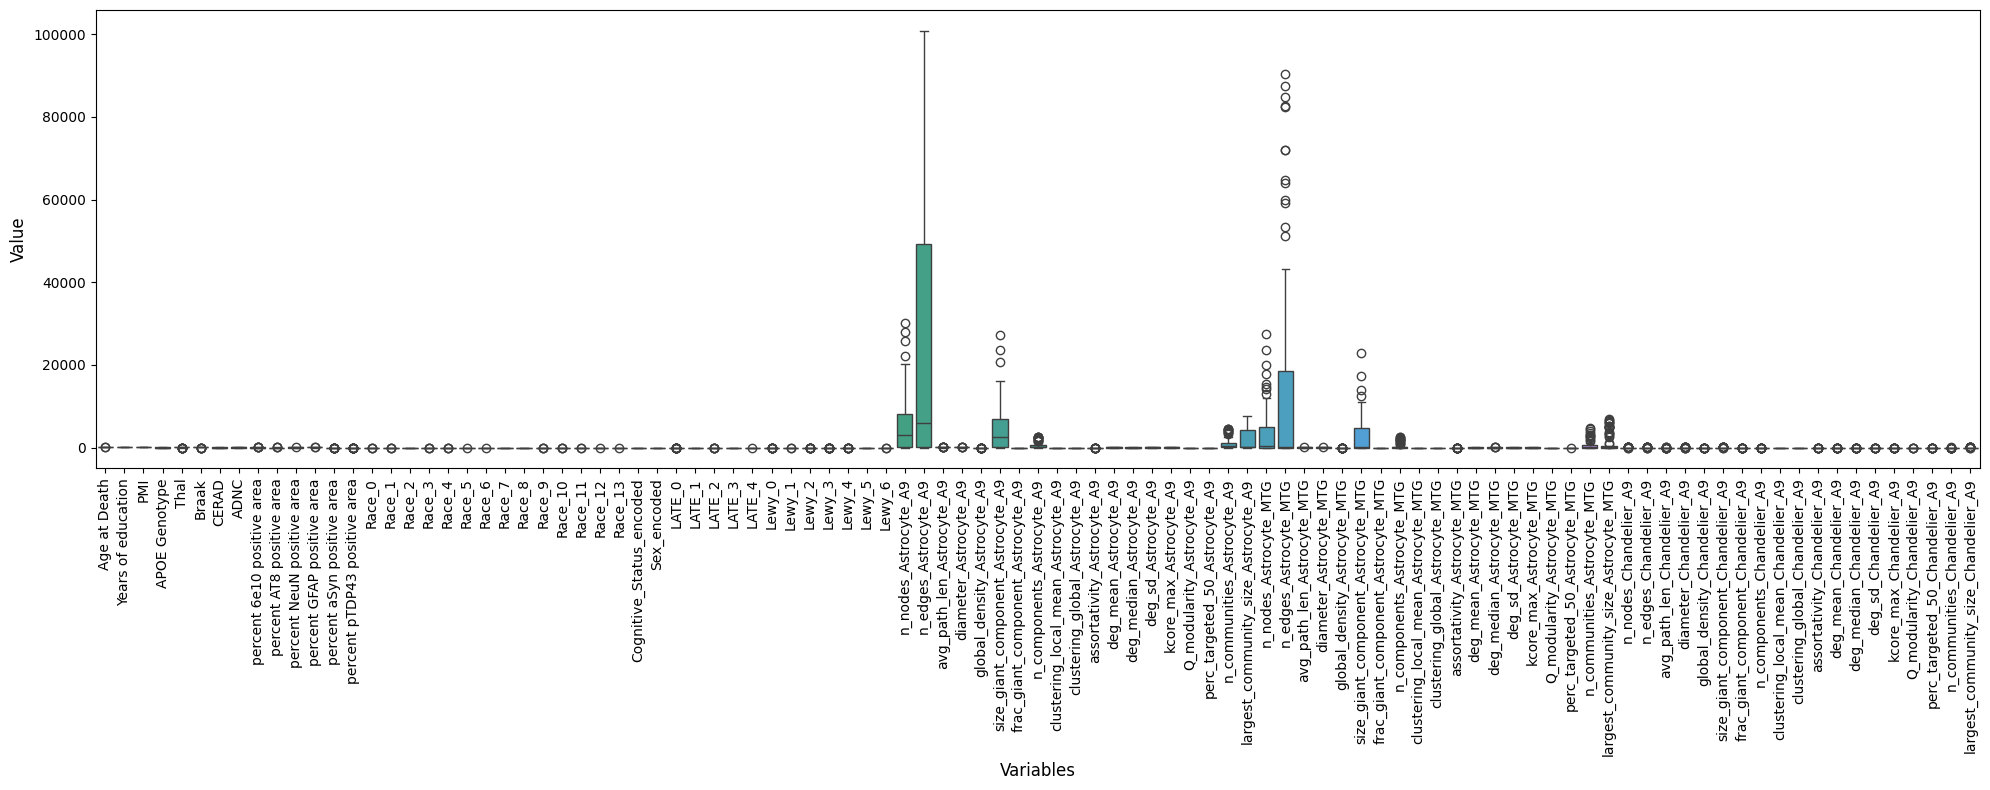

In [30]:
#Vars boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_simple)
#plt.title('Boxplots of 100 Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [31]:
def flooring_capping(df: pd.DataFrame,
                                 lower_quantile: float = 0.05,
                                 upper_quantile: float = 0.95) -> pd.DataFrame:
    """
    Applies flooring and capping to all numeric columns in a DataFrame using the quantiles method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        lower_quantile (float): The lower quantile to define the floor.
        upper_quantile (float): The upper quantile to define the ceiling.

    Returns:
        pd.DataFrame: A new DataFrame with the outliers handled.
    """

    #Select only the numeric columns and create a copy to avoid SettingWithCopyWarning
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_copy = df.copy()

    for col in numeric_cols:
        #Calculate the lower and upper limits using the specified quantiles.
        lower_limit = df_copy[col].quantile(lower_quantile)
        upper_limit = df_copy[col].quantile(upper_quantile)

        #Apply flooring y capping
        df_copy[col] = df_copy[col].clip(lower=lower_limit, upper=upper_limit)

    return df_copy

In [32]:
floo_filter = flooring_capping(df=data, lower_quantile = 0.05,
                                 upper_quantile = 0.95)

In [33]:
floo_filter.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.00,16.0,10.016667,1.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.094842,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.00,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.00,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,0.036251,0.384980,0.674943,-0.062684,0.145281,0.357426,0.486620
3,H21-33-015,98.00,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,72.45,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.033192,0.120584,-0.189214,0.031712,-0.082098,-0.086830,-0.004337,0.232218
5,H21-33-043,95.00,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.00,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.00,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.033192,0.206852,-0.189214,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.00,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,72.45,18.0,3.660000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


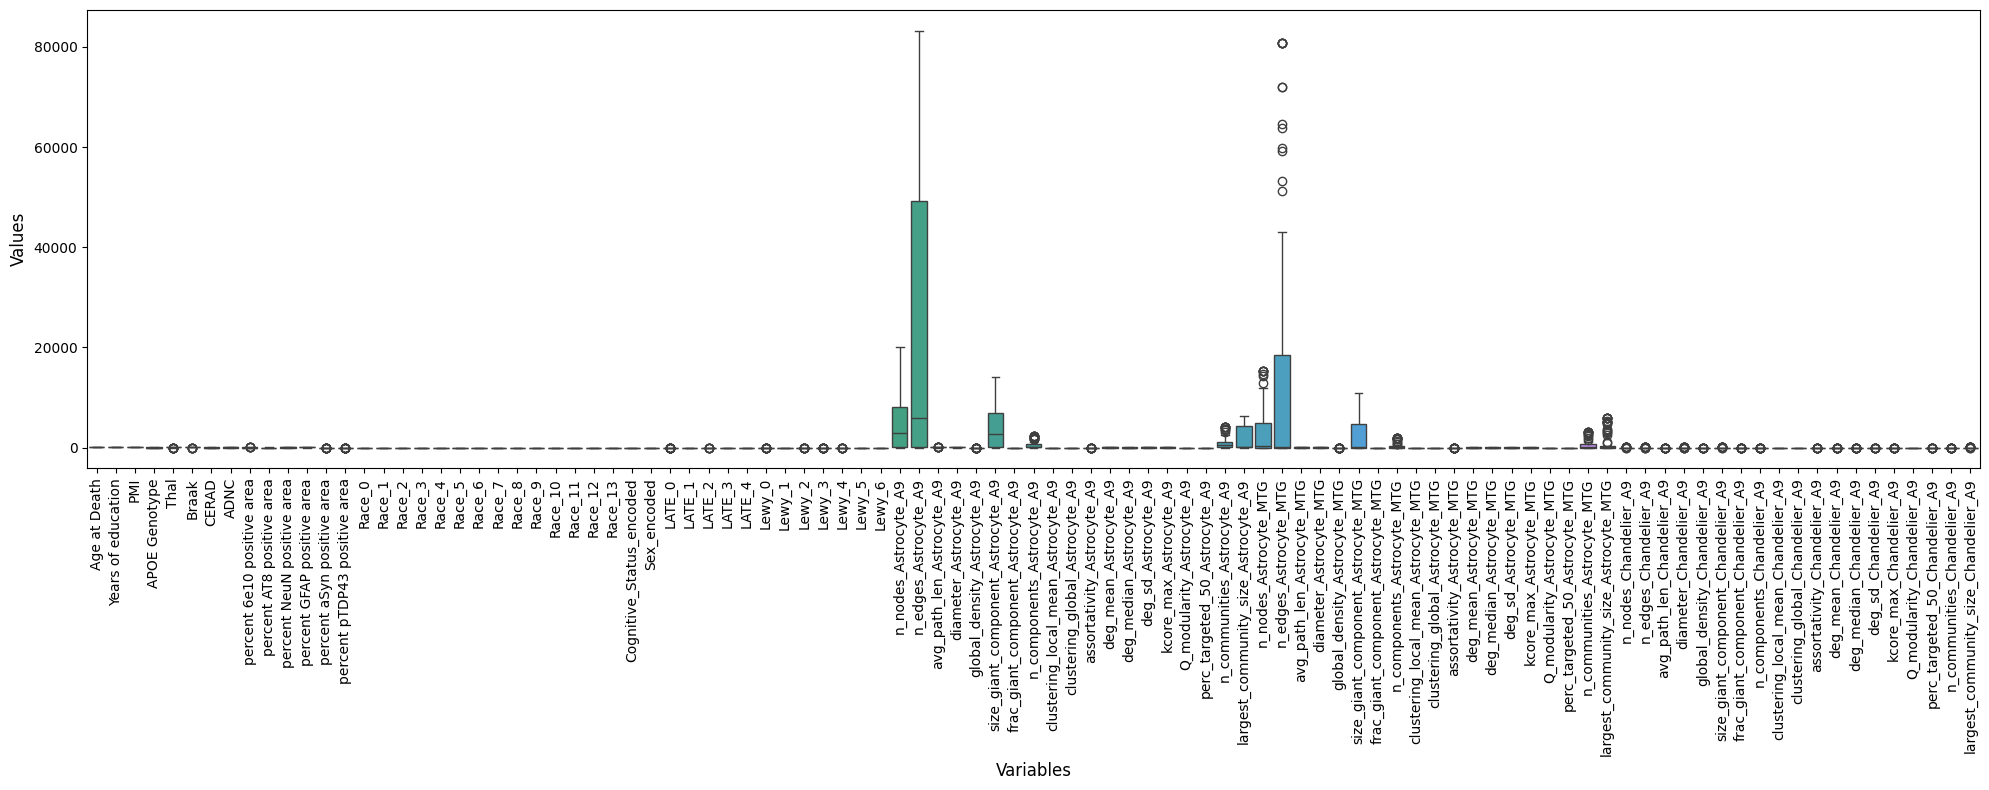

In [34]:
#Complete boxplot
floo_filterpl= floo_filter[floo_filter.columns[:100].tolist()]
plt.figure(figsize=(20, 8))
sns.boxplot(data= floo_filterpl)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
print(data.shape)

print(floo_filter.shape)

(84, 7099)
(84, 7099)


##  The variables here stay as they are

# 3.Linear correlation between variables.


In [36]:
def fs_linear_corr(df, zscore_threshold=2.0):
    """
    Variable selection based on Pearson's linear correlation.

    Params
    ------
    df : pd.DataFrame
        Original dataset with numeric and non-numeric variables.
    zscore_threshold : float
        Z-score to define high correlation threshold.

    Returns
    -------
    dict with:
        - df_filtered: DataFrame with final columns (filtered numeric + non-numeric)
        - final_features: list of final selected variables
        - stats: dict with mean, std, thresholds, and deleted variables
- corr_matrix: final squared correlation matrix
- corrs_pre: pre-filtered upper triangle values
- corrs_post: post-filtered upper triangle values
    """

    #Get numric and non numeric vars
    num_df = df.select_dtypes(include=[np.number]).copy()
    non_num_df = df.select_dtypes(exclude=[np.number]).copy()

    #Drop zero variance vars
    variance = num_df.var()
    num_df = num_df.loc[:, variance > 0]

    #Corr matrix
    corr_matrix = num_df.corr(method='pearson').fillna(0)

    #Get correlation distributions
    corrs_pre = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()
    mean_corr = corrs_pre.mean()
    std_corr = corrs_pre.std()

    #Define thresholds based on z-scores
    upper_threshold = mean_corr + zscore_threshold * std_corr
    lower_threshold = mean_corr - zscore_threshold * std_corr

    #Drop reduntant data
    to_drop = set()
    for col in corr_matrix.columns:
        if col in to_drop:
            continue
        high_corr = corr_matrix.index[(corr_matrix[col].abs() > upper_threshold) & (corr_matrix.index != col)]
        to_drop.update(high_corr)

    final_features = [col for col in num_df.columns if col not in to_drop]

    #Final dataframe
    df_filtered = pd.concat([num_df[final_features], non_num_df], axis=1)

    #Final corr matrix (only with selected features)
    corr_matrix_final = df_filtered[final_features].corr().fillna(0)

    #Final corr distribution
    corrs_post = corr_matrix_final.where(np.triu(np.ones(corr_matrix_final.shape), k=1).astype(bool)).stack()

    stats = {
        "mean_corr": mean_corr,
        "std_corr": std_corr,
        "upper_threshold": upper_threshold,
        "lower_threshold": lower_threshold,
        "zscore_threshold": zscore_threshold,
        "num_removed": len(to_drop)#,
       # "removed_features": list(to_drop)
    }

    return {
        "df_filtered": df_filtered,
        "final_features": final_features,
        "stats": stats,
        "corr_matrix": corr_matrix_final,
        "corrs_pre": corrs_pre,
        "corrs_post": corrs_post
    }


In [37]:
linear_filter = fs_linear_corr(data, zscore_threshold=2.0)

In [38]:
print(linear_filter['stats']["mean_corr"])
print(linear_filter['stats']["upper_threshold"])
print(linear_filter['stats']["lower_threshold"])

0.0006141248951024859
0.4871701675962569
-0.48594191780605195


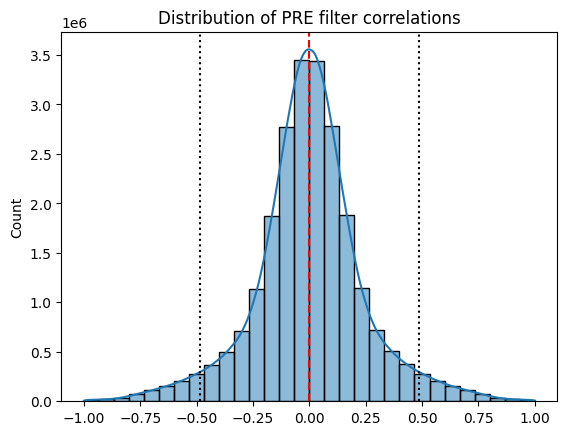

In [40]:
#Plot Linear correlation Pre-filter distribution
sns.histplot(linear_filter["corrs_pre"], bins=30, kde=True)
plt.axvline(linear_filter["stats"]["mean_corr"], color='red', linestyle='--', label=f'Media ({linear_filter["stats"]["mean_corr"]:.2f})')
plt.axvline(linear_filter['stats']["upper_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['upper_threshold']:.2f})')
plt.axvline(linear_filter['stats']["lower_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['lower_threshold']:.2f})')

plt.title("Distribution of PRE filter correlations")
plt.show()

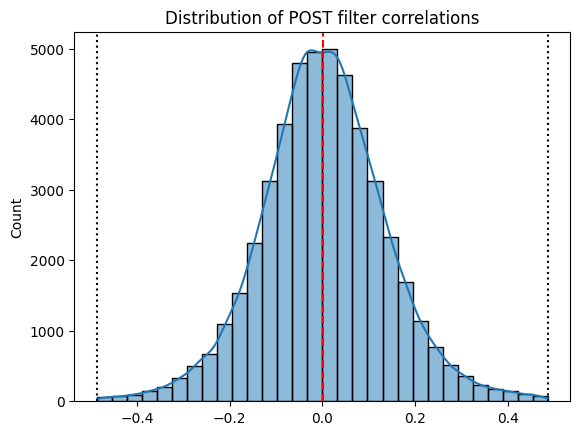

In [41]:
#Plot Linear correlation Post-filter distribution
sns.histplot(linear_filter["corrs_post"], bins=30, kde=True)
plt.axvline(linear_filter["stats"]["mean_corr"], color='red', linestyle='--', label=f'Media ({linear_filter["stats"]["mean_corr"]:.2f})')
plt.axvline(linear_filter['stats']["upper_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['upper_threshold']:.2f})')
plt.axvline(linear_filter['stats']["lower_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['lower_threshold']:.2f})')

plt.title("Distribution of POST filter correlations")
plt.show()

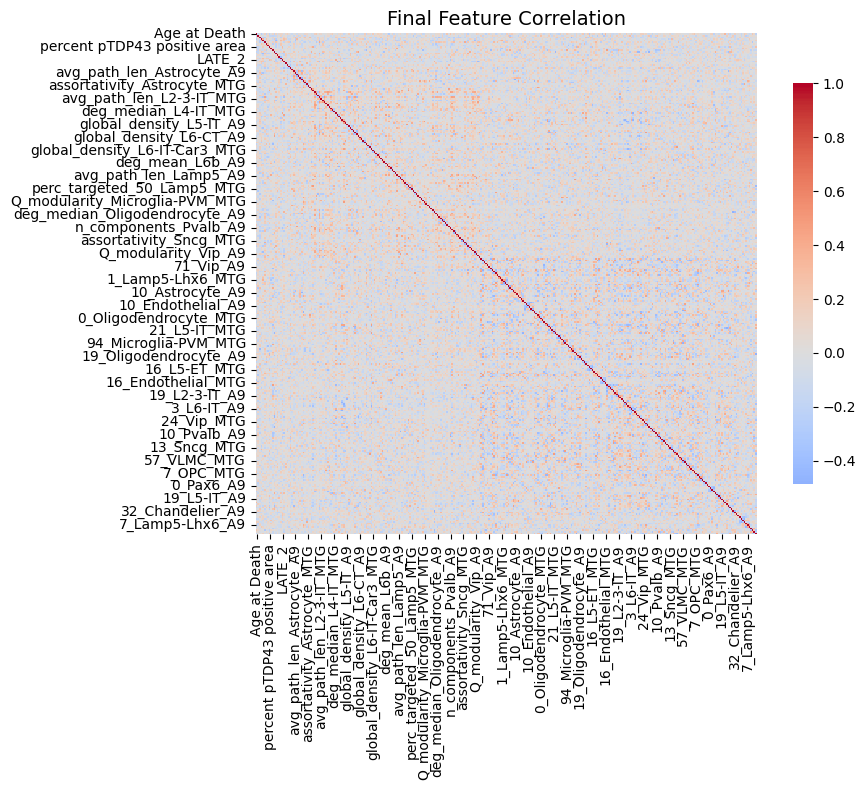

In [42]:
corr_matrix = linear_filter["corr_matrix"]

def plot_corrmatrix(corr_matrix, figsize=(10,8), cmap="coolwarm", title="Correlation Matrix"):
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        cmap=cmap,
        annot=False,
        center=0,
        square=True,
        cbar_kws={"shrink": .8}
    )
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()
plot_corrmatrix(corr_matrix, title="Final Feature Correlation")

## The vars after the linear correlation filter are in :

In [46]:
linear_filter["final_features"][:15]

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Braak',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 'Race_0',
 'Race_5',
 'Race_12',
 'Cognitive_Status_encoded',
 'Sex_encoded',
 'LATE_0']

## 4. Non-Linear correlation between variables (Mutual Information and Variation of Information)

#### Targets are

* Overall AD Neuropathological Change (ADNC)
* Braak
* Thal
* CERAD
* LATE-NC
* Lewy Body Disease Stage
* 6e10
* AT8
* NeuN
* GFAP
* aSyn
* pTDP43

In [47]:
target_vars = ['ADNC',
 'Braak',
 'Thal',
 'CERAD',
 'LATE_0',
 'LATE_1',
 'LATE_2',
 'LATE_3',
 'LATE_4',
 'Lewy_0',
 'Lewy_1',
 'Lewy_2',
 'Lewy_3',
 'Lewy_4',
 'Lewy_5',
 'Lewy_6',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 ]

In [ ]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy

def fs_mi_vi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10, threshold_quantile: float = 0.5):
    """
    Calculate MI and VI, and filter to retain the MOST DIFFERENT variables (highest VI) with respect to the targets, for feature selection.
    """
    #Only numerics first
    numerics = df.select_dtypes(include=np.number)

    #Check missing targets in the data
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Target variables not found or not numeric: {missing_targets}")

    #Discretize with KBinsDiscretizer (because some distributions are short)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile", subsample=None)
    discretized_data = discretizer.fit_transform(numerics)
    df_disc = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    #Initialize matrices
    mi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)
    vi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)

    #Calculate MI and VI
    for t in target_vars:
        t_vals = df_disc[t].astype(int)
        for c in df_disc.columns:
            c_vals = df_disc[c].astype(int)
            if t_vals.nunique() <= 1 or c_vals.nunique() <= 1:
                continue

            mi = mutual_info_score(t_vals, c_vals)
            #Check entropy
            h_t = entropy(np.bincount(t_vals) / len(t_vals))
            h_c = entropy(np.bincount(c_vals) / len(c_vals))
            vi = h_t + h_c - 2 * mi

            mi_matrix.loc[t, c] = mi
            vi_matrix.loc[t, c] = vi

    #Get threshold on VI (distance of information)
    """
    Take all distances from the VI matrix, Ignore trivial comparisons (zero distance), sort  distances internally from smallest to largest.
    Set a cut-off based on a percentage (the quantile).
    For example, if you use the 0.90 quantile, you are finding the distance value that separates the 90% of the ‘closest’ connections from the 10% of the ‘furthest’ ones.
    """

    values = vi_matrix.values.flatten()
    values = values[values > 0] #This line removes all zeros from the VI vector, then having only data with VI.
    threshold_vi = np.quantile(values, threshold_quantile) if len(values) > 0 else None

    #Filter matrices to keep only those that exceed the VI threshold values > 0
    vi_filtered = vi_matrix.where(vi_matrix >= threshold, 0) #Keep the high VI values that meet the condition.
    mi_filtered = mi_matrix.where(vi_matrix >= threshold, 0) #use the ‘difference’ mask (from VI) to see which MI values correspond to those pairs of ‘different’ variables.

    return mi_matrix, vi_matrix, mi_filtered, vi_filtered, threshold

In [49]:
mi_matrix, vi_matrix, mi_filt, vi_filt, th = fs_mi_vi_matrix(data, target_vars, n_bins=10, threshold_quantile=0.9)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306

In [61]:
th

np.float64(3.4838526253581006)

In [50]:
mi_matrix.head(10)

,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,percent AT8 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
ADNC,0.215754,0.090671,0.155894,0.190995,0.799312,0.562302,0.530931,1.210448,0.531452,0.631620,...,0.183975,0.160418,0.115777,0.145084,0.175274,0.147136,0.190204,0.223424,0.169869,0.139892
Braak,0.272153,0.111081,0.214654,0.124387,0.309638,1.046094,0.306598,0.562302,0.369571,0.542518,...,0.160887,0.180133,0.193894,0.164453,0.165623,0.188759,0.177736,0.230813,0.143103,0.141721
Thal,0.319592,0.120664,0.216340,0.196950,1.195274,0.309638,0.421469,0.799312,0.649108,0.471136,...,0.240221,0.243919,0.184636,0.207559,0.309992,0.194277,0.278787,0.269337,0.209075,0.230021
CERAD,0.090709,0.096569,0.103593,0.140767,0.421469,0.306598,0.864150,0.530931,0.488079,0.359404,...,0.136446,0.077830,0.120074,0.116876,0.122760,0.072770,0.071601,0.149537,0.069204,0.105911
LATE_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lewy_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
vi_matrix.head(10)

,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,percent AT8 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
ADNC,3.045043,2.689445,3.199556,1.915983,8.070972e-01,1.131938,1.012735e+00,4.440892e-16,2.448440,2.248104,...,3.143395,3.190508,3.279790,3.221176,3.160797,3.217073,3.130936,3.064496,3.171607,3.231560
Braak,2.767892,2.484270,2.917683,1.884846,1.622093e+00,0.000000,1.297048e+00,1.131938e+00,2.607849,2.261956,...,3.025218,2.986726,2.959204,3.018085,3.015746,2.969473,2.991520,2.885366,3.060785,3.063550
Thal,2.822194,2.614285,3.063491,1.888900,4.440892e-16,1.622093,1.216487e+00,8.070972e-01,2.197955,2.553899,...,3.015730,3.008333,3.126900,3.081053,2.876188,3.107618,2.938596,2.957497,3.078021,3.036128
CERAD,2.948836,2.331350,2.957860,1.670141,1.216487e+00,1.297048,1.554312e-15,1.012735e+00,2.188889,2.446238,...,2.892156,3.009387,2.924898,2.931296,2.919528,3.019506,3.021845,2.865972,3.026639,2.953225
LATE_0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_2,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_3,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LATE_4,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lewy_0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
print(mi_filt.head(10))
print(mi_filt.shape)

        Age at Death  Years of education  PMI  APOE Genotype  Thal  Braak  \
ADNC             0.0                 0.0  0.0            0.0   0.0    0.0   
Braak            0.0                 0.0  0.0            0.0   0.0    0.0   
Thal             0.0                 0.0  0.0            0.0   0.0    0.0   
CERAD            0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_0           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_1           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_2           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_3           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_4           0.0                 0.0  0.0            0.0   0.0    0.0   
Lewy_0           0.0                 0.0  0.0            0.0   0.0    0.0   

        CERAD  ADNC  percent 6e10 positive area  percent AT8 positive area  \
ADNC      0.0   0.0                         0.0                        0.0

In [60]:
print(vi_filt.head(10))
print(vi_filt.shape)

        Age at Death  Years of education  PMI  APOE Genotype  Thal  Braak  \
ADNC             0.0                 0.0  0.0            0.0   0.0    0.0   
Braak            0.0                 0.0  0.0            0.0   0.0    0.0   
Thal             0.0                 0.0  0.0            0.0   0.0    0.0   
CERAD            0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_0           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_1           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_2           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_3           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_4           0.0                 0.0  0.0            0.0   0.0    0.0   
Lewy_0           0.0                 0.0  0.0            0.0   0.0    0.0   

        CERAD  ADNC  percent 6e10 positive area  percent AT8 positive area  \
ADNC      0.0   0.0                         0.0                        0.0

##  The variables chosen for feature selection are

In [67]:
features_information = vi_filt.columns[(vi_filt > 0).any(axis=0)].tolist()
print(len(features_information))
features_information[:10]

4940


['Age at Death',
 'Years of education',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'n_nodes_Astrocyte_A9',
 'n_edges_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'size_giant_component_Astrocyte_A9',
 'frac_giant_component_Astrocyte_A9']

# 6. PCA


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fs_pca_loadings(df: pd.DataFrame, n_components: int = 2, n_top_variables: int = 5):
    """
    Realiza PCA sobre las columnas numéricas de un DataFrame y devuelve las variables
    más influyentes (loadings) para cada Componente Principal.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        n_components (int): Número de Componentes Principales a analizar.
        n_top_variables (int): Número de variables más influyentes a devolver por componente.

    Returns:
        tuple: Una tupla conteniendo:
            - pca_object (PCA): El objeto PCA ajustado de scikit-learn.
            - loadings_df (pd.DataFrame): DataFrame con los loadings de cada variable por componente.
            - top_variables (dict): Diccionario con las N variables más influyentes para cada PC.
    """
    # 1. Seleccionar solo columnas numéricas
    numerics = df.select_dtypes(include=np.number)

    if numerics.shape[1] < n_components:
        raise ValueError("The number of components cannot be greater than the number of numerical variables.")

    # 2. Estandarizar los datos (paso crucial)
    scaled_data = StandardScaler().fit_transform(numerics)

    # 3. Aplicar PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    # 1. Transforma los datos estandarizados al espacio del PCA
    pca_data = pca.transform(scaled_data)
    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

    # 4. Analizar los "Loadings"
    # Los loadings están en el atributo 'components_' del objeto PCA
    loadings_df = pd.DataFrame(
        pca.components_.T, # .T para transponer y tener variables en filas
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=numerics.columns
    )

    # 5. Identificar las variables más influyentes
    top_variables = {}
    for pc in loadings_df.columns:
        # Tomamos el valor absoluto de los loadings, los ordenamos y seleccionamos los N más altos
        top_vars = loadings_df[pc].abs().sort_values(ascending=False).head(n_top_variables).index.tolist()
        top_variables[pc] = top_vars

    #Varianza explicada
    explained_variance_ratio = pca.explained_variance_ratio_
    # Varianza acumulada
    cumulative_variance = np.cumsum(explained_variance_ratio)

    return pca, pca_df, loadings_df, top_variables, explained_variance_ratio, cumulative_variance

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fs_pca(df: pd.DataFrame, n_components: int = 2, n_top_variables: int = 5):
    """
    Realiza PCA sobre las columnas numéricas y devuelve todos los objetos clave para el análisis.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        n_components (int): Número de Componentes Principales a calcular.
        n_top_variables (int): Número de variables más influyentes a reportar por componente.

    Returns:
        tuple: Una tupla conteniendo:
            - pca_object (PCA): Objeto PCA ajustado de scikit-learn.
            - pca_df (pd.DataFrame): DataFrame de los datos transformados (scores).
            - loadings_df (pd.DataFrame): DataFrame con los loadings de cada variable.
            - top_variables (dict): Diccionario con las N variables más influyentes por PC.
            - explained_variance_ratio (np.array): Varianza explicada por cada componente.
            - cumulative_variance (np.array): Varianza acumulada.
    """
    # 1. Seleccionar solo columnas numéricas
    numerics = df.select_dtypes(include=np.number)

    if numerics.shape[1] < n_components:
        raise ValueError("El número de componentes no puede ser mayor que el número de variables.")

    # 2. Estandarizar los datos
    scaled_data = StandardScaler().fit_transform(numerics)

    # 3. Aplicar PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    # 4. Transformar los datos (Scores)
    pca_data = pca.transform(scaled_data)
    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

    # 5. Calcular los Loadings
    loadings_df = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=numerics.columns
    )

    # 6. Identificar las variables más influyentes
    top_variables = {}
    for pc in loadings_df.columns:
        top_vars = loadings_df[pc].abs().sort_values(ascending=False).head(n_top_variables).index.tolist()
        top_variables[pc] = top_vars

    # 7. Obtener la varianza
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    return pca, pca_df, loadings_df, top_variables, explained_variance_ratio, cumulative_variance

In [88]:
 pca, pca_df, loadings_df, top_variables_pca, explained_variance_ratio, cumulative_variance = fs_pca(data,  n_components=4, n_top_variables=1000)

In [89]:
pca.explained_variance_ratio_

array([0.20468304, 0.05563252, 0.04883273, 0.0389798 ])

In [90]:
pca_df.head(10)

,PC1,PC2,PC3,PC4
0,37.283532,-22.231076,-14.851109,0.421246
1,-33.480946,12.137239,-22.432486,12.664447
2,42.688971,-15.662181,-15.465266,14.416710
3,-30.124801,-2.825025,12.015337,3.070977
4,14.372591,-22.630583,11.126640,-8.558855
5,-24.495374,-2.392691,-2.576455,0.678794
6,-23.419043,6.934776,11.745752,-18.517877
7,52.601661,-18.108450,-7.921162,-17.234377
8,-30.804716,2.712409,1.132063,-9.811653
9,-22.074571,0.211389,11.545781,-1.578277



--- PCA Scores Plot ---


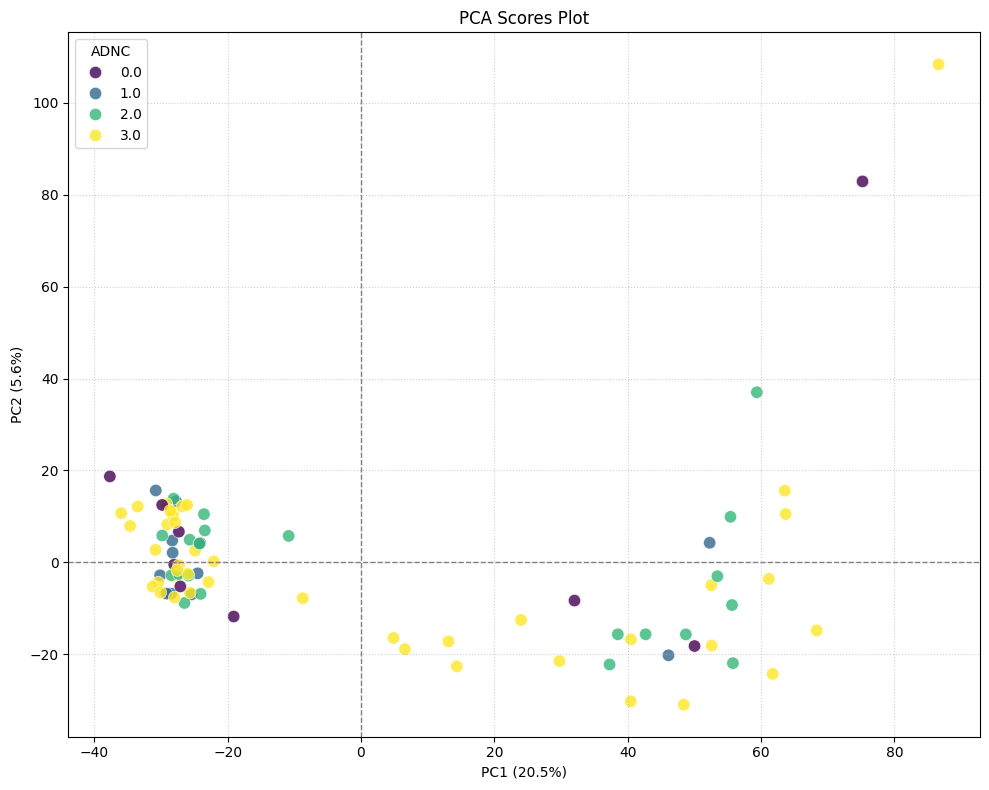

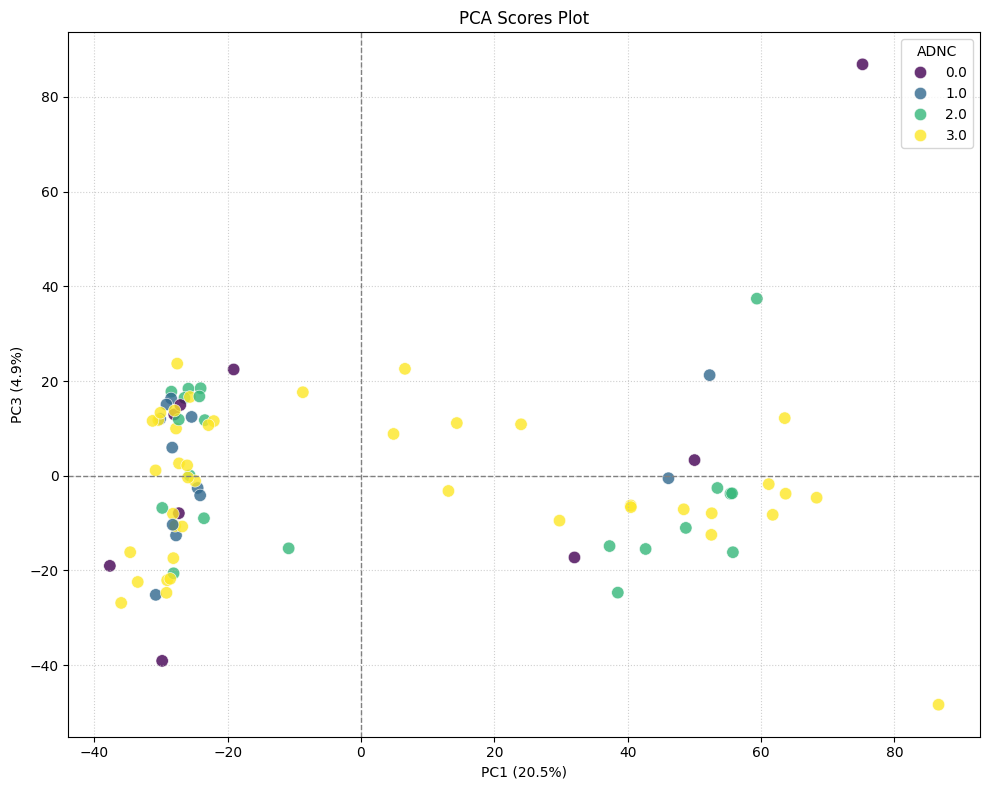

In [103]:
#Sample Points Graph (Scores Plot)

def plot_pca_scores(pca_df: pd.DataFrame, explained_variance_ratio: np.array,
                    component_x: int = 1, component_y: int = 2,
                    color_by: pd.Series = None, title: str = "PCA Scores Plot"):
    """
    Genera un gráfico de dispersión de las muestras en el espacio PCA.

    Args:
        pca_df (pd.DataFrame): DataFrame con los datos transformados (scores).
        explained_variance_ratio (np.array): Varianza explicada por cada PC.
        component_x (int): El número del PC para el eje X (ej. 1 para PC1).
        component_y (int): El número del PC para el eje Y (ej. 2 para PC2).
        color_by (pd.Series, opcional): Una serie de Pandas con una variable categórica para colorear los puntos.
        title (str): Título del gráfico.
    """
    if component_x > pca_df.shape[1] or component_y > pca_df.shape[1]:
        raise ValueError(f"Componentes {component_x} o {component_y} no disponibles. n_components fue {pca_df.shape[1]}.")

    pc_x_label = f'PC{component_x}'
    pc_y_label = f'PC{component_y}'

    plt.figure(figsize=(10, 8))

    if color_by is not None and len(color_by) == len(pca_df):
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        hue=color_by, # Color por la variable categórica
                        s=80, alpha=0.8, edgecolor='w', linewidth=0.5,
                        palette='viridis') # Puedes cambiar la paleta
    else:
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        s=80, alpha=0.8, edgecolor='w', linewidth=0.5,
                        color='skyblue') # Color por defecto

    plt.title(title)
    plt.xlabel(f'{pc_x_label} ({explained_variance_ratio[component_x-1]:.1%})')
    plt.ylabel(f'{pc_y_label} ({explained_variance_ratio[component_y-1]:.1%})')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.axvline(0, color='grey', lw=1, linestyle='--')
    plt.tight_layout()
    plt.show()

# --- Uso ---
print("\n--- PCA Scores Plot ---")
plot_pca_scores(pca_df, explained_variance_ratio, color_by=data['ADNC'])
plot_pca_scores(pca_df, explained_variance_ratio, component_x=1, component_y=3,  color_by=data['ADNC']) # Ejemplo con PC1 y PC3

In [92]:
#Loadings per PC
loadings_df.head(10)

,PC1,PC2,PC3,PC4
Age at Death,-0.000432,0.001048,-0.007871,-0.010707
Years of education,-0.006057,0.002283,0.007967,-0.003681
PMI,0.002501,0.008069,-0.000217,-0.010805
APOE Genotype,-0.001229,0.000499,-0.002350,0.005067
Thal,0.001350,-0.006278,-0.007714,0.001817
Braak,0.003580,-0.005493,0.005330,-0.007544
CERAD,0.001196,-0.000733,-0.003300,-0.003579
ADNC,0.002014,-0.006028,-0.008070,-0.000518
percent 6e10 positive area,-0.000174,-0.008134,-0.001505,0.003990
percent AT8 positive area,-0.004763,-0.001711,0.001575,0.001472



--- PCA Loadings Plot ---


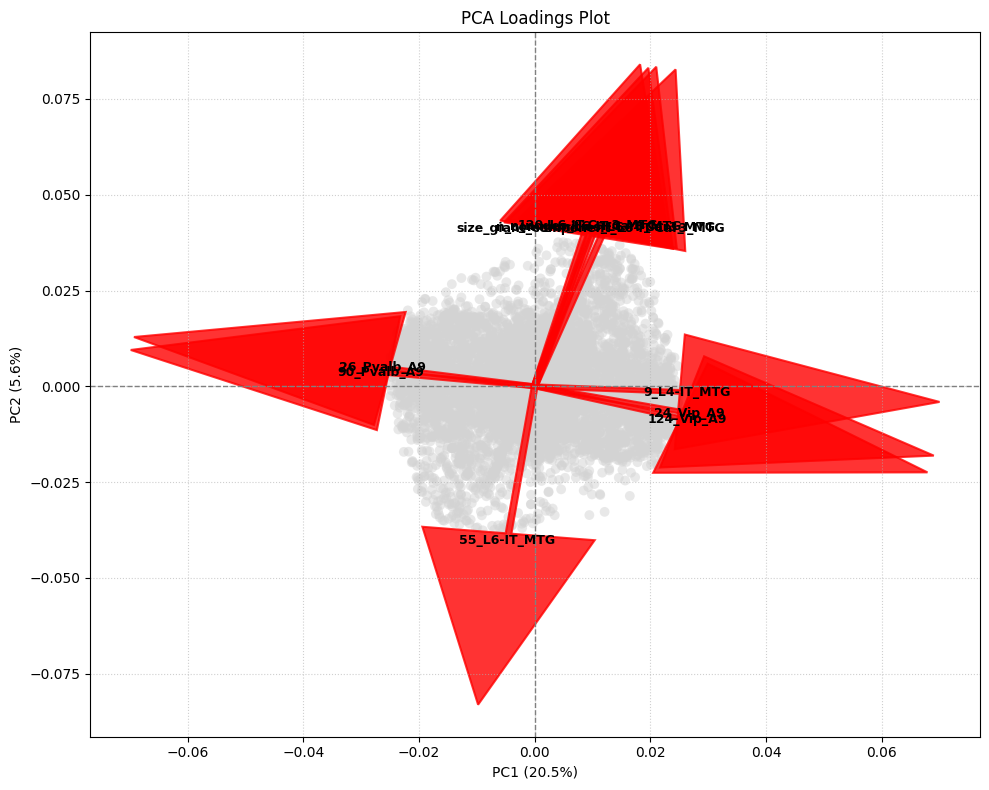

In [104]:
#Variable Loadings Graph

def plot_pca_loadings(loadings_df: pd.DataFrame, explained_variance_ratio: np.array, top_variables: dict,
                      component_x: int = 1, component_y: int = 2, title: str = "PCA Loadings Plot"):
    """
    Genera un gráfico de los loadings de las variables en el espacio PCA.

    Args:
        loadings_df (pd.DataFrame): DataFrame con los loadings de cada variable.
        explained_variance_ratio (np.array): Varianza explicada por cada PC.
        top_variables (dict): Diccionario con las N variables más influyentes por PC.
        component_x (int): El número del PC para el eje X.
        component_y (int): El número del PC para el eje Y.
        title (str): Título del gráfico.
    """
    pc_x_label = f'PC{component_x}'
    pc_y_label = f'PC{component_y}'

    if pc_x_label not in loadings_df.columns or pc_y_label not in loadings_df.columns:
        raise ValueError(f"Componentes {pc_x_label} o {pc_y_label} no disponibles en loadings_df.")

    plt.figure(figsize=(10, 8))

    # Dibuja todos los loadings como puntos de fondo (más tenues)
    sns.scatterplot(x=loadings_df[pc_x_label], y=loadings_df[pc_y_label],
                    color='lightgrey', alpha=0.5, s=50, edgecolor='none')

    # Identifica las variables principales de ambos componentes para destacarlas
    all_top_vars = []
    if pc_x_label in top_variables:
        all_top_vars.extend(top_variables[pc_x_label])
    if pc_y_label in top_variables:
        all_top_vars.extend(top_variables[pc_y_label])

    unique_top_vars = list(set(all_top_vars))

    # Dibuja flechas solo para las variables más influyentes
    for var in unique_top_vars:
        x = loadings_df.loc[var, pc_x_label]
        y = loadings_df.loc[var, pc_y_label]

        plt.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.03, lw=1.5)
        plt.text(x * 1.05, y * 1.05, var, color='black', ha='center', va='center', fontsize=9, fontweight='bold')

    plt.title(title)
    plt.xlabel(f'{pc_x_label} ({explained_variance_ratio[component_x-1]:.1%})')
    plt.ylabel(f'{pc_y_label} ({explained_variance_ratio[component_y-1]:.1%})')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.axvline(0, color='grey', lw=1, linestyle='--')
    plt.tight_layout()
    plt.show()

# --- Uso ---
print("\n--- PCA Loadings Plot ---")
plot_pca_loadings(loadings_df, explained_variance_ratio, top_variables)


--- PCA Biplot ---


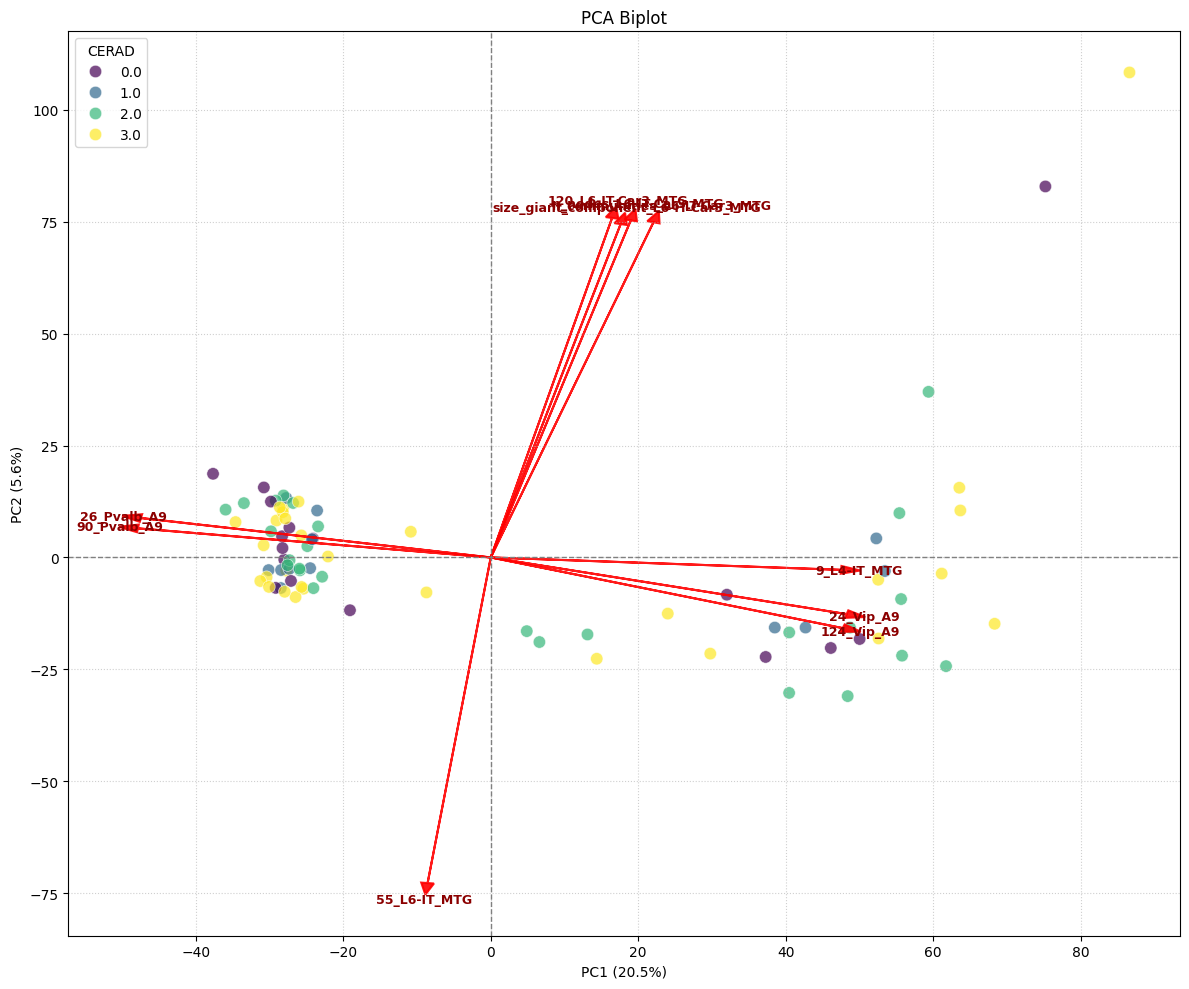

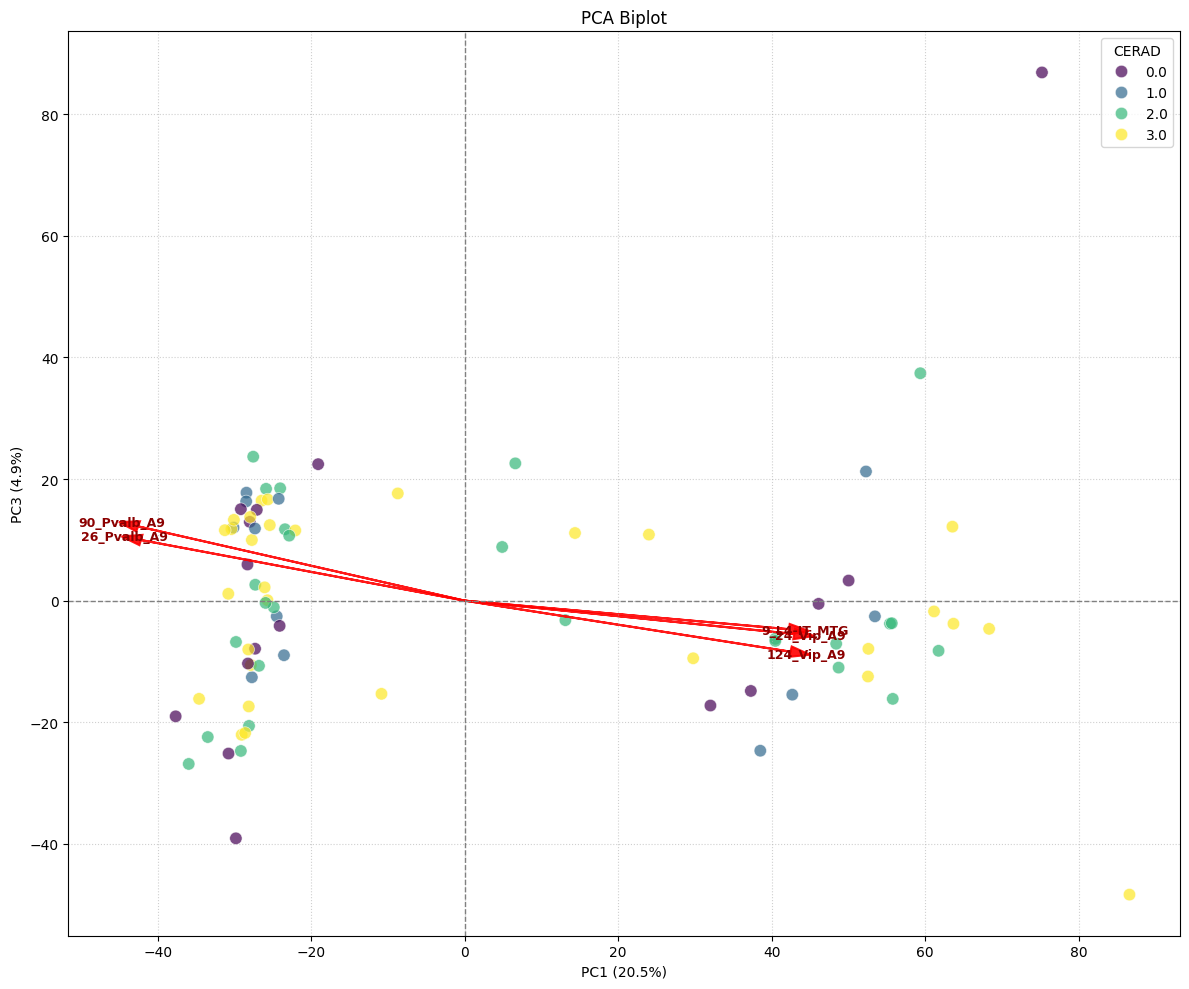

In [108]:
#Combined Scores and Loadings Chart

def plot_biplot(pca_df: pd.DataFrame, loadings_df: pd.DataFrame, explained_variance_ratio: np.array, top_variables: dict,
                component_x: int = 1, component_y: int = 2,
                color_by: pd.Series = None, title: str = "PCA Biplot"):
    """
    Genera un Biplot, combinando los puntos de las muestras y los vectores de los loadings.

    Args:
        pca_df (pd.DataFrame): DataFrame con los datos transformados (scores).
        loadings_df (pd.DataFrame): DataFrame con los loadings de cada variable.
        explained_variance_ratio (np.array): Varianza explicada por cada PC.
        top_variables (dict): Diccionario con las N variables más influyentes por PC.
        component_x (int): El número del PC para el eje X.
        component_y (int): El número del PC para el eje Y.
        color_by (pd.Series, opcional): Una serie de Pandas con una variable categórica para colorear los puntos.
        title (str): Título del gráfico.
    """
    pc_x_label = f'PC{component_x}'
    pc_y_label = f'PC{component_y}'

    if pc_x_label not in pca_df.columns or pc_y_label not in pca_df.columns:
        raise ValueError(f"Componentes {pc_x_label} o {pc_y_label} no disponibles en pca_df.")
    if pc_x_label not in loadings_df.columns or pc_y_label not in loadings_df.columns:
        raise ValueError(f"Componentes {pc_x_label} o {pc_y_label} no disponibles en loadings_df.")

    plt.figure(figsize=(12, 10))

    # 1. Gráfico de Scores (puntos de las muestras)
    if color_by is not None and len(color_by) == len(pca_df):
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        hue=color_by,
                        s=80, alpha=0.7, edgecolor='w', linewidth=0.5,
                        palette='viridis')
    else:
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        s=80, alpha=0.7, edgecolor='w', linewidth=0.5,
                        color='skyblue')

    # Para superponer los loadings, necesitamos una escala diferente si los loadings son muy pequeños
    # Normalizamos para que los loadings quepan en el mismo gráfico que los scores
    x_max = pca_df[pc_x_label].abs().max()
    y_max = pca_df[pc_y_label].abs().max()
    load_max_x = loadings_df[pc_x_label].abs().max()
    load_max_y = loadings_df[pc_y_label].abs().max()

    # Factor de escala para los loadings
    scale_factor_x = x_max / load_max_x if load_max_x > 0 else 1
    scale_factor_y = y_max / load_max_y if load_max_y > 0 else 1

    # Elegimos el factor más pequeño para asegurar que todo quepa sin desbordar
    scale_factor = min(scale_factor_x, scale_factor_y) * 0.7 # Un poco de margen

    # 2. Gráfico de Loadings (vectores de las variables más influyentes)
    all_top_vars = []
    if pc_x_label in top_variables:
        all_top_vars.extend(top_variables[pc_x_label])
    if pc_y_label in top_variables:
        all_top_vars.extend(top_variables[pc_y_label])

    unique_top_vars = list(set(all_top_vars))

    for var in unique_top_vars:
        x_load = loadings_df.loc[var, pc_x_label] * scale_factor
        y_load = loadings_df.loc[var, pc_y_label] * scale_factor

        plt.arrow(0, 0, x_load, y_load, color='red', alpha=0.9, head_width=x_max * 0.02, lw=1.5)
        plt.text(x_load * 1.05, y_load * 1.05, var, color='darkred', ha='center', va='center', fontsize=9, fontweight='bold')

    plt.title(title)
    plt.xlabel(f'{pc_x_label} ({explained_variance_ratio[component_x-1]:.1%})')
    plt.ylabel(f'{pc_y_label} ({explained_variance_ratio[component_y-1]:.1%})')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.axvline(0, color='grey', lw=1, linestyle='--')
    plt.tight_layout()
    plt.show()

# --- Uso ---
print("\n--- PCA Biplot ---")
plot_biplot(pca_df, loadings_df, explained_variance_ratio, top_variables, color_by=data['CERAD'])
plot_biplot(pca_df, loadings_df, explained_variance_ratio, top_variables,
            component_x=1, component_y=3, color_by=data['CERAD']) # Ejemplo con PC1 y PC3

In [97]:
#Top variables that explain the variance per PC
top_variables_pca

{'PC1': ['24_Vip_A9',
  '90_Pvalb_A9',
  '124_Vip_A9',
  '9_L4-IT_MTG',
  '26_Pvalb_A9',
  '71_Pvalb_A9',
  '104_L4-IT_MTG',
  '17_L4-IT_MTG',
  '1_Vip_A9',
  '44_Pvalb_A9',
  '108_L4-IT_A9',
  '125_Pvalb_A9',
  '74_Pvalb_A9',
  '27_Vip_A9',
  '61_Pvalb_A9',
  '93_Pvalb_A9',
  '65_Pvalb_A9',
  '32_Pvalb_A9',
  '35_Vip_MTG',
  '49_L4-IT_MTG',
  '126_L4-IT_MTG',
  '115_Pvalb_A9',
  '28_Pvalb_A9',
  '95_Vip_A9',
  '77_Pvalb_A9',
  '116_Sst_A9',
  '119_Pvalb_A9',
  '104_Vip_A9',
  '103_L4-IT_MTG',
  '32_L4-IT_A9',
  '99_Vip_A9',
  '41_Vip_A9',
  '95_Lamp5_A9',
  '44_Vip_A9',
  '120_Vip_A9',
  '28_L4-IT_A9',
  '84_Pvalb_A9',
  '3_Pvalb_A9',
  '114_Sst_A9',
  '11_L2-3-IT_MTG',
  '53_Pvalb_A9',
  '50_Pvalb_A9',
  '49_Pvalb_A9',
  '37_Lamp5_A9',
  '117_Vip_A9',
  '22_L2-3-IT_A9',
  '10_Vip_MTG',
  '10_L5-IT_MTG',
  '106_Vip_A9',
  '101_Sst_A9',
  '104_Vip_MTG',
  '113_L2-3-IT_MTG',
  '100_L4-IT_A9',
  '104_L2-3-IT_A9',
  '105_L4-IT_A9',
  '68_L5-IT_A9',
  '121_L4-IT_MTG',
  '93_Pvalb_MTG',
  '

In [98]:
#The proportion of the dataset's variance that each principal component accounts for
explained_variance_ratio

array([0.20468304, 0.05563252, 0.04883273, 0.0389798 ])

In [99]:
cumulative_variance

array([0.20468304, 0.26031556, 0.30914829, 0.34812809])


--- Scree Plot ---


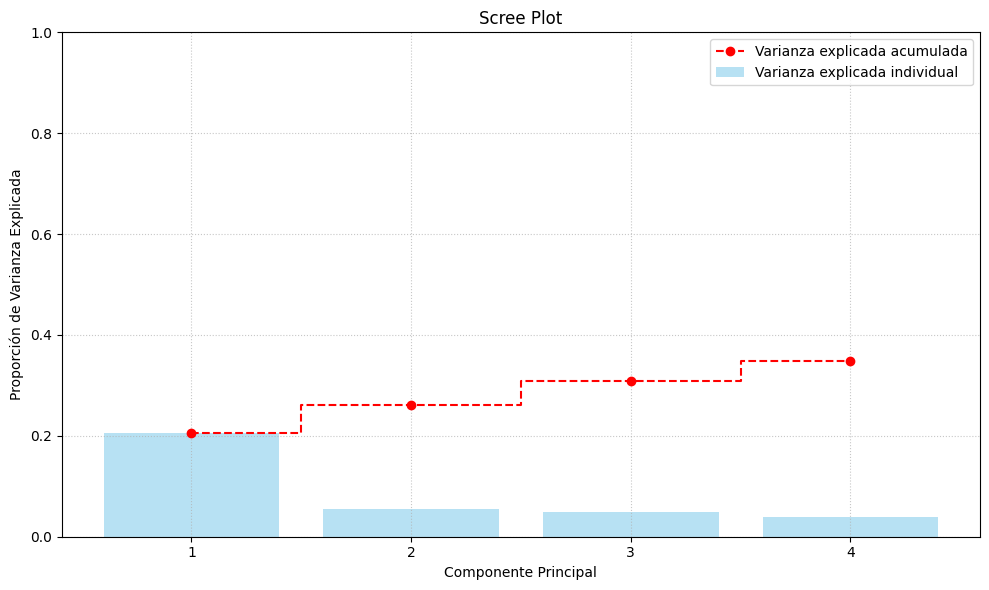

In [100]:
#Explained Variance Plot (Scree Plot)

def plot_scree(explained_variance_ratio: np.array, cumulative_variance: np.array, title: str = "Scree Plot"):
    """
    Genera un Scree Plot mostrando la varianza explicada individual y acumulada por cada PC.

    Args:
        explained_variance_ratio (np.array): Varianza explicada por cada PC.
        cumulative_variance (np.array): Varianza acumulada.
        title (str): Título del gráfico.
    """
    n_components = len(explained_variance_ratio)

    plt.figure(figsize=(10, 6))

    plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.6, align='center',
            label='Varianza explicada individual', color='skyblue')

    plt.step(range(1, n_components + 1), cumulative_variance, where='mid',
             label='Varianza explicada acumulada', color='red', linestyle='--', marker='o')

    plt.ylabel('Proporción de Varianza Explicada')
    plt.xlabel('Componente Principal')
    plt.title(title)
    plt.xticks(range(1, n_components + 1))
    plt.ylim(0, 1) # La varianza explicada siempre va de 0 a 1
    plt.legend(loc='best')
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Uso ---
print("\n--- Scree Plot ---")
plot_scree(explained_variance_ratio, cumulative_variance)

## Variables chosen by PCA are

In [112]:
# 1. Decide cuántos componentes usarás. Por ejemplo, los dos primeros.
components_to_use = ['PC1', 'PC2', 'PC3', 'PC4']

# 2. Recopila las listas de variables de esos componentes
list_of_lists = [top_variables[pc] for pc in components_to_use if pc in top_variables]

# 3. Aplana la lista de listas y elimina duplicados para obtener el vector final
# Usamos un set para la eficiencia al eliminar duplicados
if list_of_lists:
    # `sum(list_of_lists, [])` es un truco para aplanar la lista
    selected_features_vector = sorted(list(set(sum(list_of_lists, []))))
else:
    selected_features_vector = []


print("El vector de variables escogidas con PCA es:")
print(len(selected_features_vector))
selected_features_vector

El vector de variables escogidas con PCA es:
10


['120_L6-IT-Car3_MTG',
 '124_Vip_A9',
 '24_Vip_A9',
 '26_Pvalb_A9',
 '55_L6-IT_MTG',
 '90_Pvalb_A9',
 '9_L4-IT_MTG',
 'n_communities_L6-IT-Car3_MTG',
 'n_nodes_L6-IT-Car3_MTG',
 'size_giant_component_L6-IT-Car3_MTG']

# 7. Voting matrix

In [113]:
from sklearn.preprocessing import MultiLabelBinarizer

def voting_matrix(filters_dict: dict, min_votes: int = 2):
    """
    Genera una matriz de votación de variables filtradas por distintas funciones,
    y devuelve la lista de variables ganadoras.

    Args:
        filters_dict (dict): Diccionario {nombre_filtro: lista_de_variables}.
        min_votes (int): Número mínimo de votos para considerar a una variable como ganadora.

    Returns:
        vote_df (pd.DataFrame): Matriz binaria de votación (variables x filtros + votos).
        winners (list): Lista de variables con al menos `min_votes` votos.
    """
    # Crear lista de listas
    filter_names = list(filters_dict.keys())
    filter_vars = list(filters_dict.values())

    # Usar MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform(filter_vars)

    # Crear DataFrame binario
    vote_df = pd.DataFrame(binary_matrix.T, index=mlb.classes_, columns=filter_names)

    # Agregar columna con total de votos
    vote_df["votes"] = vote_df.sum(axis=1)

    # Variables ganadoras
    winners = vote_df[vote_df["votes"] >= min_votes].index.tolist()

    return vote_df.sort_values("votes", ascending=False), winners


In [114]:
filters = {
    "completeness_vars": completeness_vars,
    "variance_vars": variance_vars,
    "linear_vars": linear_filter["final_features"],
    "non_linear_vars": features_information,
    "pca_vars": selected_features_vector
}

vote_matrix, winners = voting_matrix(filters, min_votes=2)

print("Matriz de votación:\n", vote_matrix)
print("\nVariables ganadoras:", winners)


Matriz de votación:
                                    completeness_vars  variance_vars  \
global_density_Oligodendrocyte_A9                  1              1   
3_Sst_A9                                           1              1   
1_Sncg_A9                                          1              1   
28_Vip_MTG                                         1              1   
93_L6-IT_MTG                                       1              1   
...                                              ...            ...   
85_OPC_A9                                          1              0   
85_Lamp5-Lhx6_A9                                   1              0   
85_Sst-Chodl_MTG                                   1              0   
86_L5-IT_A9                                        1              0   
86_Lamp5-Lhx6_MTG                                  1              0   

                                   linear_vars  non_linear_vars  pca_vars  \
global_density_Oligodendrocyte_A9            1   